In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [6]:
customer_data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [9]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customer_data.drop(columns='CustomerID').describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [14]:
customer_data.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


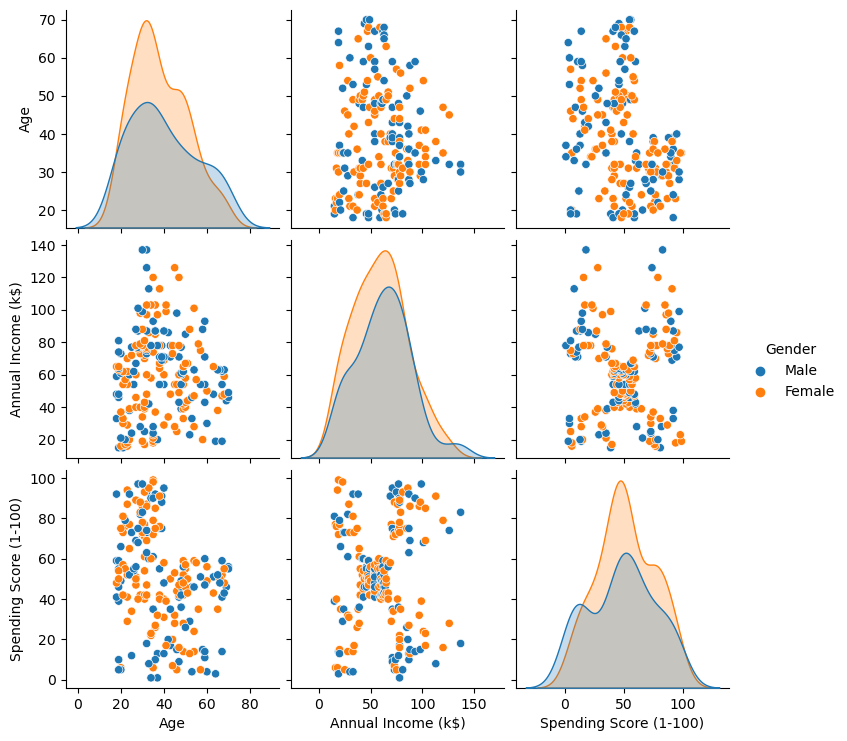

In [15]:
sns.pairplot(customer_data.drop(columns='CustomerID'), hue='Gender');

In [16]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
customer_data['Gender'] = customer_data['Gender'].astype('category').cat.codes
customer_data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int8

In [21]:
import plotly.express as px
fig = px.scatter(customer_data, x=customer_data.index, y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [22]:
df = customer_data

In [23]:
def plot_3d_clusters(df, feature_cols, num_clusters):
    # extract the feature columns from the dataframe
    X = df[feature_cols]

    # perform K-means clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
    df['cluster'] = kmeans.labels_

    # create 3D scatter plot of the clustered data
    fig = go.Figure(data=[go.Scatter3d(
        x=df[feature_cols[0]],
        y=df[feature_cols[1]],
        z=df[feature_cols[2]],
        mode='markers',
        marker=dict(
            color=df['cluster'],
            size=10,
            opacity=0.8
        )
    )])

    fig.update_layout(scene=dict(
        xaxis_title=feature_cols[0],
        yaxis_title=feature_cols[1],
        zaxis_title=feature_cols[2]
    ), title=f'K-means Clustering {num_clusters} Clusters 3D Scatter Plot')

    return fig

In [24]:
def createKmeanModels(data, mak_k, min_k =1):
    kmodels = [KMeans(n_clusters=k).fit(data) for k in range(min_k, mak_k)]
    return kmodels

In [27]:
import plotly.graph_objs as go
from sklearn.cluster import KMeans
for i in range(2, 9):
    fig = plot_3d_clusters(df, ['Age', 'Annual Income (k$)','Spending Score (1-100)'], num_clusters=i)
    fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [28]:
def elbow_plot(data, max_k):
   
    models = createKmeanModels(data, max_k)
    distortions = [model.inertia_ for model in models]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, max_k+1)), y=distortions, mode='lines+markers'))
    fig.update_layout(title='Elbow plot for KMeans clustering',
                      xaxis_title='Number of clusters',
                      yaxis_title='Distortion')

    return fig

In [29]:
elbow_plot(df, 9)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [30]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler 

In [32]:
df_ss = StandardScaler().fit_transform(customer_data)
df_ss = pd.DataFrame(df_ss)
df_ss

,0,1,2,3,4,5
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0.542922
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0.058170
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0.542922
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0.058170
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0.542922
...,...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,1.997178
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,1.512426
197,1.688771,1.128152,-0.491602,2.497807,0.923953,1.997178
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,1.512426


In [33]:
df_ss.columns = customer_data.columns

In [34]:
df_ss.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [35]:
df_ss

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0.542922
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0.058170
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0.542922
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0.058170
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0.542922
...,...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,1.997178
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,1.512426
197,1.688771,1.128152,-0.491602,2.497807,0.923953,1.997178
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,1.512426


In [36]:
df_mm = MinMaxScaler().fit_transform(customer_data)
df_mm = pd.DataFrame(df_mm)
df_mm

,0,1,2,3,4,5
0,0.000000,1.0,0.019231,0.000000,0.387755,0.571429
1,0.005025,1.0,0.057692,0.000000,0.816327,0.428571
2,0.010050,0.0,0.038462,0.008197,0.051020,0.571429
3,0.015075,0.0,0.096154,0.008197,0.775510,0.428571
4,0.020101,0.0,0.250000,0.016393,0.397959,0.571429
...,...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918,1.000000
196,0.984925,0.0,0.519231,0.909836,0.275510,0.857143
197,0.989950,1.0,0.269231,0.909836,0.744898,1.000000
198,0.994975,1.0,0.269231,1.000000,0.173469,0.857143


In [37]:
df_mm.columns = customer_data.columns

In [38]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [39]:
fig = px.scatter(df_ss, x=df_ss['Annual Income (k$)'], y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [41]:
fig = px.scatter(customer_data, x=customer_data['Annual Income (k$)'], y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [42]:
fig = px.scatter(df_mm, x=df_mm['Annual Income (k$)'], y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [43]:
plot_3d_clusters(df_ss,  ['Age', 'Annual Income (k$)','Spending Score (1-100)'], 5)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
plot_3d_clusters(df_mm,  ['Age', 'Annual Income (k$)','Spending Score (1-100)'], 5)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [45]:
from sklearn.decomposition import PCA

In [46]:
X_pca = PCA(n_components=3).fit_transform(df_ss)

In [47]:
df_pca = pd.DataFrame(X_pca)
df_pca

,0,1,2
0,-0.316927,-2.373591,-0.871291
1,-0.983705,-1.931309,-1.563394
2,0.912139,-3.040351,-0.843620
3,-1.042288,-2.018424,-1.873787
4,-0.529040,-2.359274,-0.692044
...,...,...,...
195,-0.130889,3.040289,-0.653309
196,3.112560,1.834726,0.438579
197,0.163106,3.254378,-0.208170
198,3.627412,2.119448,0.409650


In [48]:
df_pca.columns = ['col1', 'col2', 'col3']

In [49]:
for i in range(2, 6):
    fig = plot_3d_clusters(df_pca,  ['col1', 'col2','col3'], i)
    fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

